This notebook is using weight generated from moire_model and assumes that it has been already run. It is only used for visualization.

c:\Users\yuval\Downloads\test\simple_dataset\layer1


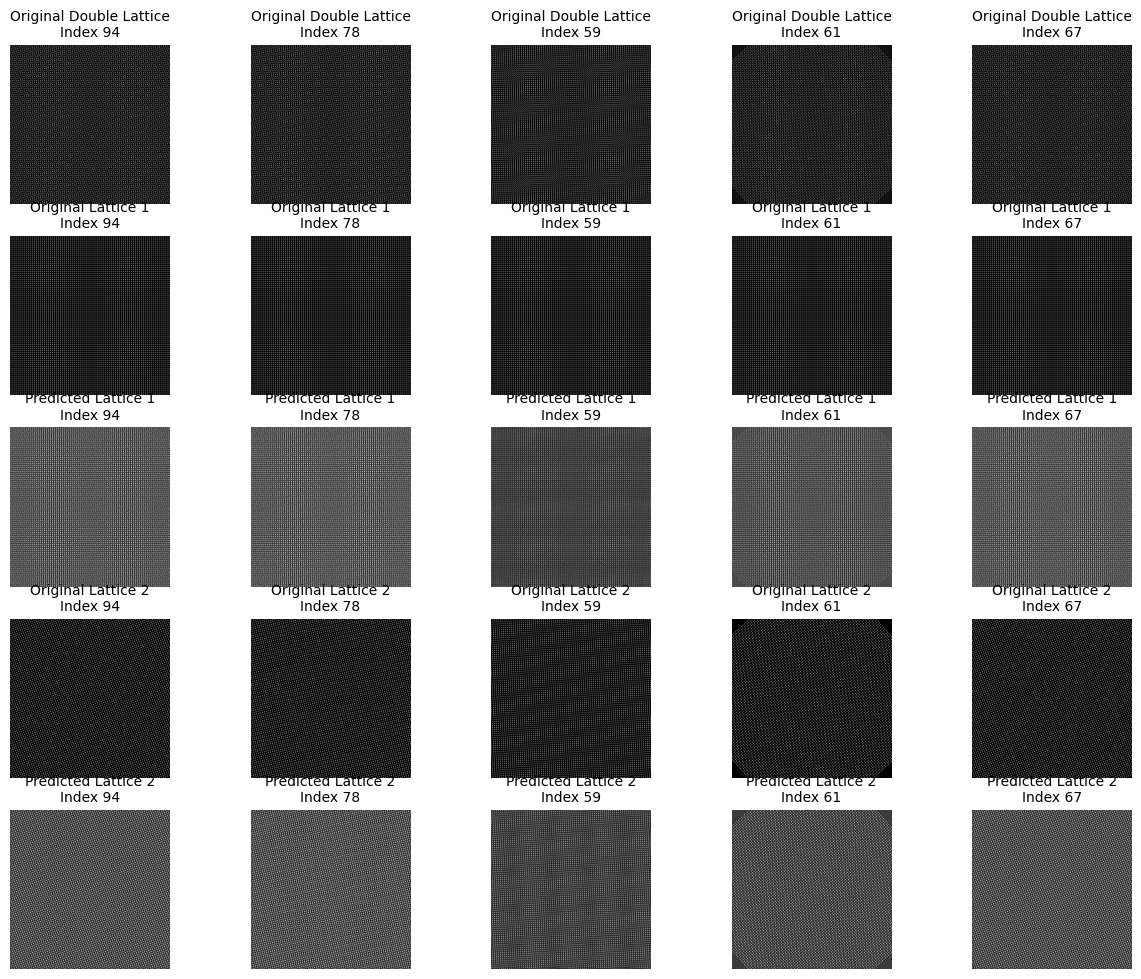

In [ ]:
import torch
import matplotlib.pyplot as plt
import random

from moire_model import (
    TEMLatticeSeparator,
    TEMLatticeDataset
)

# =======================
# CONFIG
# =======================
WEIGHTS_PATH = "tem_lattice_separator_10.pth"
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
N_SAMPLES = 5
OUT_PATH = "grid_prediction_output_with_predicted_lattice1.png"

# =======================
# LOAD MODEL
# =======================
model = TEMLatticeSeparator().to(DEVICE)
state_dict = torch.load(WEIGHTS_PATH, map_location=DEVICE)
model.load_state_dict(state_dict)
model.eval()

# =======================
# LOAD DATASET
# =======================
dataset = TEMLatticeDataset("simple_dataset")
indices = random.sample(range(len(dataset)), N_SAMPLES)

# =======================
# FIGURE SETUP
# =======================
labels = [
    "Original Double Lattice",
    "Original Lattice 1",
    "Predicted Lattice 1",
    "Original Lattice 2",
    "Predicted Lattice 2"
]

n_rows = len(labels)
fig, axes = plt.subplots(
    n_rows,
    N_SAMPLES,
    figsize=(3 * N_SAMPLES, 2.4 * n_rows)
)

# =======================
# INFERENCE + PLOTTING
# =======================
with torch.no_grad():
    for col, idx in enumerate(indices):
        X, Y1, Y2 = dataset[idx]

        Xb = X.unsqueeze(0).to(DEVICE)
        y1p, y2p = model(Xb)

        images = [
            X.squeeze().cpu(),      # Original Double Lattice
            Y1.squeeze().cpu(),     # Original Lattice 1
            y1p.squeeze().cpu(),    # Predicted Lattice 1
            Y2.squeeze().cpu(),     # Original Lattice 2
            y2p.squeeze().cpu()     # Predicted Lattice 2
        ]

        for row, img in enumerate(images):
            axes[row, col].imshow(img, cmap="gray")
            axes[row, col].axis("off")
            axes[row, col].set_title(
                f"{labels[row]}\nIndex {idx}",
                fontsize=10,
                pad=6
            )


# =======================
# SAVE + SHOW
# =======================
plt.tight_layout()
plt.savefig(OUT_PATH, dpi=200)
plt.show()

print(f"Saved grid to {OUT_PATH}")